In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from numpy import random
from influencer_games.adaptive_dynamics.visualization import Shell
from influencer_games.utils.utilities import *
from influencer_games.domains.resource_distributions import*

[1, 1]

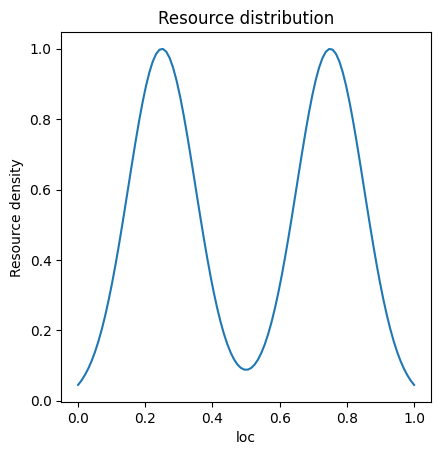

In [2]:
#The resource points
bin_points=np.linspace(.001, .999, 100)
 
#Resource parameters
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#actual resource distribution
resource_distribution2=resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)
domain=bin_points
fig, ax = plt.subplots()
ax.plot(domain,resource_distribution2)
plt.title('Resource distribution')
plt.xlabel('loc')
plt.ylabel('Resource density')
ax.set_box_aspect(1) 
fig.savefig('1d_bimodal_alpha_05.svg',bbox_inches='tight')
resource_parameters_gaussian[2]

In [3]:
def custom_influence_1d(x_torch,bin_points,parameter_instance):
    # Here is an example with x^2 influence kernels in the custom format
    scale=parameter_instance
    bin_points=torch.tensor(bin_points)
    infl=scale*(bin_points-x_torch)**2
    return infl

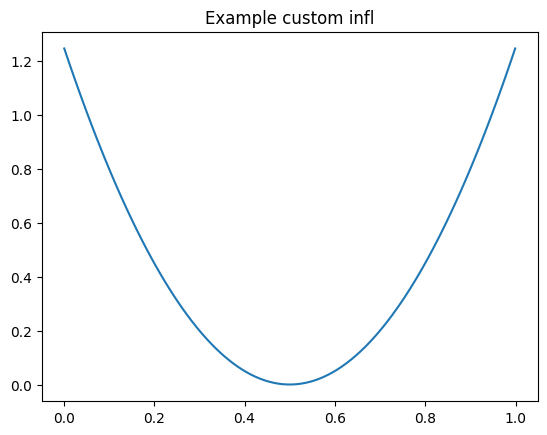

In [4]:
x=torch.tensor([.5])
scale=np.array([5])
y=custom_influence_1d(x_torch=x,bin_points=bin_points,parameter_instance=scale[0])
plt.plot(bin_points,y)
plt.title("Example custom infl")
plt.show()

In [5]:
domain_type='1d'
resource_distribution=resource_distribution2
mean=np.dot(bin_points,resource_distribution)/np.sum(resource_distribution) #mean of the resource distribution


num_agents=3#number of agents
int_agents_pos=player_postion_setup(num_agents=num_agents,setup_type='intial_symmetric_setup',domain_type=domain_type,domain_bounds=0)
int_agents_pos= np.array([.1,.45,.9])

infl_configs={"infl_type":"custom",'custom_influence':custom_influence_1d} # infleunce type of the agents


parameters=np.array([[.5,.5,.5]])# parmameters impacting agents reach (their std)
#parameters_custom=np.array([[.1,.2,.3,...]]) #needs to be length num_players

lr_type='cosine'
learning_rate=[1/10000,1/10000,500] # learning rate parameters 
#lr_type='static'
#learning_rate=1/1000
time_steps=1000 # number steps for the adaptive dyanamics


vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos.copy(), parameters=parameters,resource_distribution=resource_distribution,bin_points=bin_points,mean=mean,infl_configs=infl_configs,lr_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type=domain_type)

In [6]:
vis.setup_adaptive_env()
vis.field.gradient_accent()
og_pos_matrix=vis.field.pos_matrix
og_grad_matrix=vis.field.grad_matrix
vis.agents_pos=int_agents_pos.copy()
vis.field.agents_pos=int_agents_pos.copy()

passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!


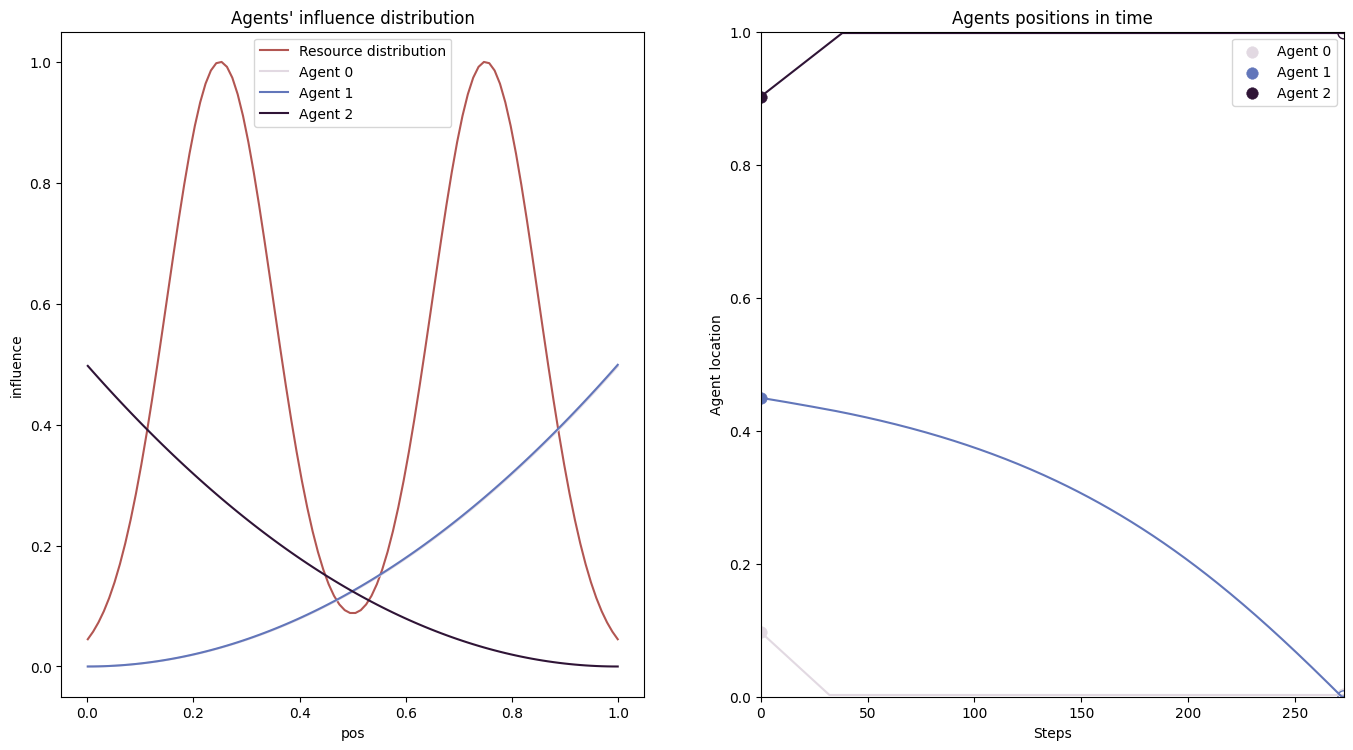

In [7]:
vis.dist_pos_gif(1)

In [8]:
from scipy.special import gamma

def custom_influence_1d_2(x_torch,bin_points,parameter_instance):
    # Here is an example with chi^2 inverse influence kernels in the custom format
    nu=parameter_instance
    bin_points=torch.tensor(bin_points)
    nu2=(nu+2)/2
    infl=(x_torch*nu2)**(nu2-1)/gamma(nu2-1)*torch.exp(-x_torch*nu2/bin_points)/bin_points**(nu2)
    return infl

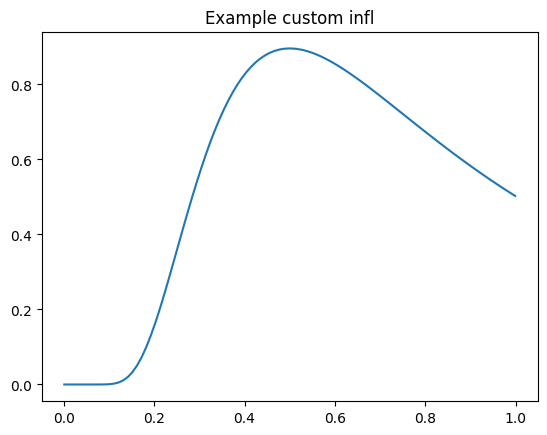

In [9]:
x=torch.tensor([.5])
scale=np.array([4])
y=custom_influence_1d_2(x_torch=x,bin_points=bin_points,parameter_instance=scale[0])
plt.plot(bin_points,y)
plt.title("Example custom infl")
plt.show()


In [10]:
domain_type='1d'
resource_distribution=resource_distribution2
mean=np.dot(bin_points,resource_distribution)/np.sum(resource_distribution) #mean of the resource distribution


num_agents=3#number of agents
int_agents_pos=player_postion_setup(num_agents=num_agents,setup_type='intial_symmetric_setup',domain_type=domain_type,domain_bounds=0)
int_agents_pos= np.array([.1,.45,.1])

infl_configs={"infl_type":"custom",'custom_influence':custom_influence_1d_2} # infleunce type of the agents


parameters=np.array([[.5,.5,.5]])# parmameters impacting agents reach (their std)
#parameters_custom=np.array([[.1,.2,.3,...]]) #needs to be length num_players

lr_type='cosine'
learning_rate=[1/10000,1/10000,500] # learning rate parameters 
#lr_type='static'
#learning_rate=1/1000
time_steps=1000 # number steps for the adaptive dyanamics


vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos.copy(), parameters=parameters,resource_distribution=resource_distribution,bin_points=bin_points,mean=mean,infl_configs=infl_configs,lr_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type=domain_type)

In [11]:
vis.setup_adaptive_env()
vis.field.gradient_accent()
og_pos_matrix=vis.field.pos_matrix
og_grad_matrix=vis.field.grad_matrix
vis.agents_pos=int_agents_pos.copy()
vis.field.agents_pos=int_agents_pos.copy()


broke


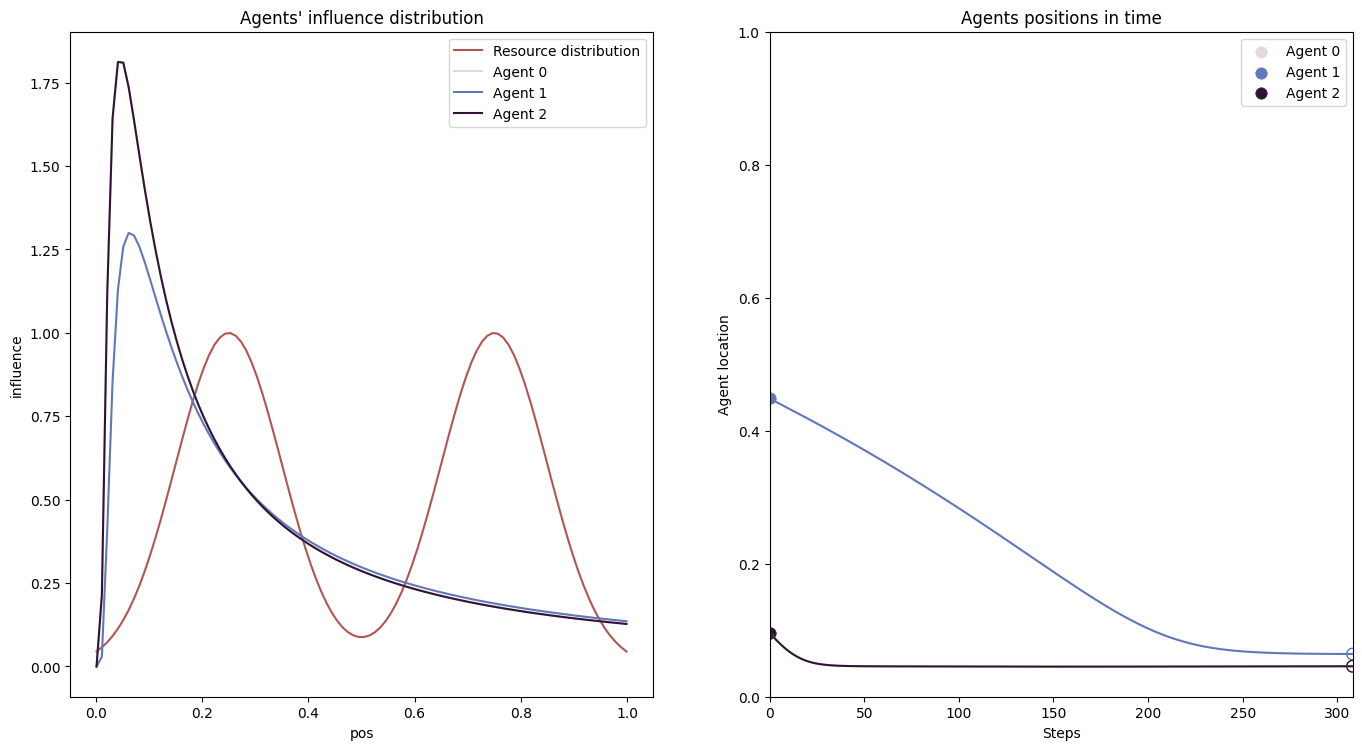

In [14]:
vis.dist_pos_gif(1)

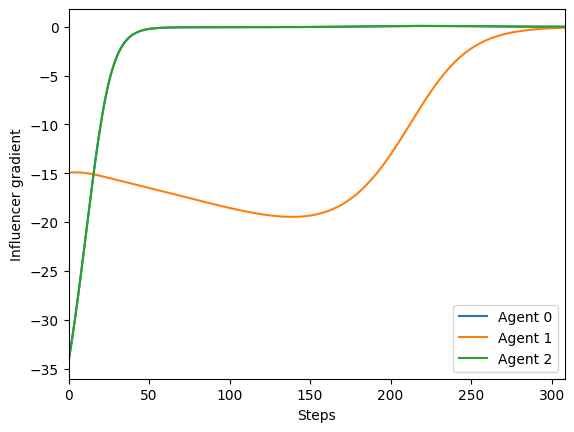

In [13]:
vis.grad_plot()